# Assignment

- Create and copy this file in folder `BME11`, name your new file's name as your group number (ex: group1.ipynb)
- Visualize data from `datasets/2019_nCoV_data.csv`

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus.

The data is available from 22 Jan 2020.

source: [kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)

## 0. Group Members

Firstname Lastname (Nickname) Student id.
Paphapin Panyphab 6113080
Suchaya Chunlasen 6113096


## 1. Read coronavirus data from `2019_nCoV_data.csv`

In [ ]:
from os import path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
import seaborn as sns
color = sns.color_palette()
sns.set()

In [2]:
def dp(dataFileName):
    '''
    This function is used to get full data path (dp) from data file name.
    '''
    return path.join('datasets', dataFileName)

In [17]:
CoViD19 = pd.read_csv(dp('2019_nCoV_data.csv'), encoding='utf-8')
CoViD19

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
5,6,01/22/2020 12:00:00,Guangdong,China,01/22/2020 12:00:00,26.0,0.0,0.0
6,7,01/22/2020 12:00:00,Guangxi,China,01/22/2020 12:00:00,2.0,0.0,0.0
7,8,01/22/2020 12:00:00,Guizhou,China,01/22/2020 12:00:00,1.0,0.0,0.0
8,9,01/22/2020 12:00:00,Hainan,China,01/22/2020 12:00:00,4.0,0.0,0.0
9,10,01/22/2020 12:00:00,Hebei,China,01/22/2020 12:00:00,1.0,0.0,0.0


## 2. Show dataframe

In [11]:
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
5,6,01/22/2020 12:00:00,Guangdong,China,01/22/2020 12:00:00,26.0,0.0,0.0
6,7,01/22/2020 12:00:00,Guangxi,China,01/22/2020 12:00:00,2.0,0.0,0.0
7,8,01/22/2020 12:00:00,Guizhou,China,01/22/2020 12:00:00,1.0,0.0,0.0
8,9,01/22/2020 12:00:00,Hainan,China,01/22/2020 12:00:00,4.0,0.0,0.0
9,10,01/22/2020 12:00:00,Hebei,China,01/22/2020 12:00:00,1.0,0.0,0.0


## 3. Show which countries that affected by the virus and how many cases have been reported

In [18]:
count_country=CoViD19.groupby(['Country']).size().reset_index(name='Case Count')
count_country


,Country,Case Count
0,Australia,32
1,Belgium,1
2,Brazil,1
3,Cambodia,9
4,Canada,20
5,China,34
6,Finland,7
7,France,12
8,Germany,9
9,Hong Kong,13


## 4. Show and visualize total number of confirmed, deaths & recovered cases in each countries and sort it by amount of confirmed cases

In [58]:
df_max_country = df.groupby(['Country']).max().drop(['Sno','Date','Last Update'],axis=1).sort_values(by=['Confirmed'],ascending=False)
df_max_country

,Confirmed,Deaths,Recovered
Country,,,
Mainland China,16678.0,479.0,522.0
China,444.0,0.0,0.0
Thailand,25.0,0.0,7.0
Singapore,24.0,0.0,0.0
Japan,22.0,0.0,1.0
Hong Kong,18.0,1.0,0.0
South Korea,16.0,0.0,0.0
Germany,12.0,0.0,0.0
Taiwan,11.0,0.0,0.0


Text(0.5,1,'Total number of confirmed, deaths & recovered cases in each countries')

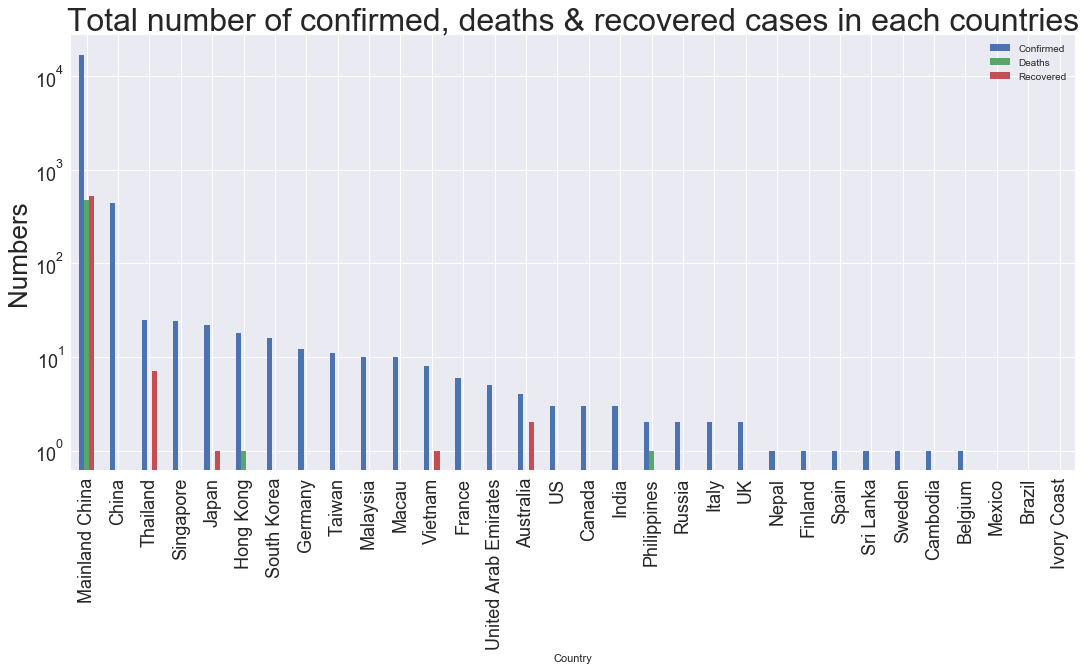

In [83]:
df_max_country.plot(kind='bar',figsize=(18,8),fontsize=18,logy=True)
plt.ylabel('Numbers', fontsize=26)
plt.title('Total number of confirmed, deaths & recovered cases in each countries', fontsize=32)


## 5. Show and visualize global spread of the coronavirus cases over time 

In [76]:
df_max_time = df.groupby(['Date']).sum().drop(['Sno','Deaths','Recovered'],axis=1)
df_max_time

,Confirmed
Date,
01/22/2020 12:00:00,555.0
01/23/2020 12:00:00,653.0
01/24/2020 12:00:00,941.0
01/25/2020 22:00:00,2019.0
01/26/2020 23:00:00,2794.0
01/27/2020 20:30:00,4473.0
01/28/2020 23:00:00,6057.0
01/29/2020 21:00:00,7783.0
01/30/2020 21:30:00,9776.0


Text(0.5,1,'Global spread of the coronavirus cases over time')

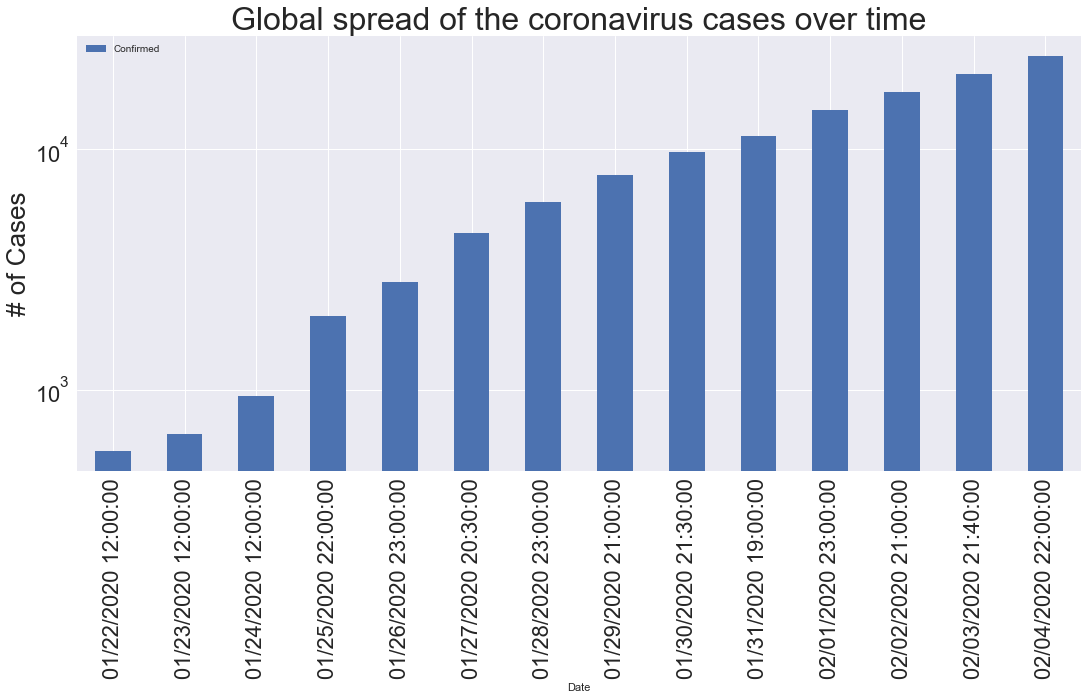

In [81]:
df_max_time.plot(kind='bar',figsize=(18,8),fontsize=22,logy=True)
plt.ylabel('# of Cases', fontsize=26)
plt.title('Global spread of the coronavirus cases over time', fontsize=32)

## 6. Show relation between confirmed cases and deaths case in linear regression

In [88]:
df_relation = df.groupby(['Confirmed']).max().drop(['Sno','Last Update','Recovered','Date','Country'],axis=1)
df_relation

,Deaths
Confirmed,
0.0,0.0
1.0,1.0
2.0,1.0
3.0,0.0
4.0,1.0
5.0,0.0
6.0,0.0
7.0,0.0
8.0,0.0


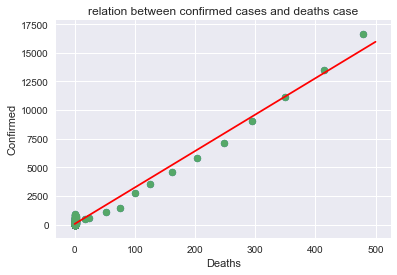

The rsquared value is: 0.977954373915851


In [99]:

x = df['Deaths']
y = df['Confirmed']
p = np.poly1d(np.polyfit(x,y,1))

plt.xlabel('Deaths')
plt.ylabel('Confirmed')
plt.title('relation between confirmed cases and deaths case')
plt.scatter(x,y)

xp = np.linspace(0, 500, 100)
plt.plot(xp,p(xp),c = 'r')
plt.scatter(x,y)
plt.show()
r2_train = r2_score(y, p(x))
print('The rsquared value is: ' + str(r2_train))

## 7. Show dependence between confirmed cases and recovered case in linear regression

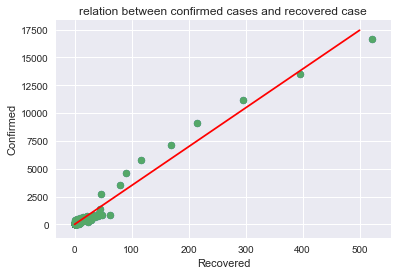

The rsquared value is: 0.9722461290686999


In [102]:

x = df['Recovered']
y = df['Confirmed']
p = np.poly1d(np.polyfit(x,y,1))

plt.xlabel('Recovered')
plt.ylabel('Confirmed')
plt.title('relation between confirmed cases and recovered case')
plt.scatter(x,y)

xp = np.linspace(0, 500, 100)
plt.plot(xp,p(xp),c = 'r')
plt.scatter(x,y)
plt.show()
r2_train = r2_score(y, p(x))
print('The rsquared value is: ' + str(r2_train))